In [1]:
from PIL import Image 
# import extract
from extract import get_plates
import OCR_NEW 
import numpy as np
import matplotlib.pyplot as plt

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [2]:
img="291.png"

In [3]:
t = !python detect.py --conf 0.5 --img-size 600 --source "291.png" --view-img --no-trace --save-txt --name plates --project extraction --save-conf

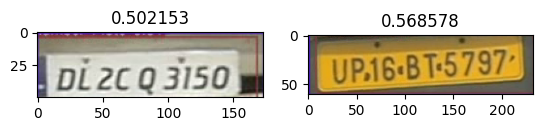

In [4]:
list=get_plates(t,img)

In [5]:
list

[[<PIL.Image.Image image mode=RGB size=173x50>,
  0.502153,
  1611,
  1784,
  710,
  760],
 [<PIL.Image.Image image mode=RGB size=233x61>, 0.568578, 183, 416, 569, 630]]

In [6]:
character_list = []

for item in list:
    pil_image = item[0]  # Extract the PIL image from the sublist
    numpy_image = np.array(pil_image)  # Convert the PIL image to a NumPy array
    characters = OCR_NEW.ocr(numpy_image)  # Apply OCR to the NumPy array
    character_list.append(characters)

print(character_list)

[[ 79  81  79 ... 110 110 110]
 [ 79  79  79 ...  83  84  83]
 [ 80  92 159 ... 116 117 110]
 ...
 [ 80  88  88 ... 133 145 133]
 [ 80  82  81 ... 207 215 189]
 [ 81  95  98 ... 219 222 188]]
[[([[0, 0], [32, 0], [32, 32], [0, 32]], 'D', 0.9984100229592094)], [], [([[0, 0], [32, 0], [32, 32], [0, 32]], 'L', 0.47027735038395074)], [([[0, 0], [32, 0], [32, 32], [0, 32]], '2', 0.9997830508610264)], [([[0, 0], [32, 0], [32, 32], [0, 32]], 'C', 0.9959128028250497)], [([[0, 0], [32, 0], [32, 32], [0, 32]], '0', 0.8344463341872519)], [], [([[0, 0], [32, 0], [32, 32], [0, 32]], '3', 0.7630590241909766)], [([[0, 0], [32, 0], [32, 32], [0, 32]], '1', 0.5514069043798031)], [([[0, 0], [32, 0], [32, 32], [0, 32]], '5', 0.9994175090506054)], [([[0, 0], [32, 0], [32, 32], [0, 32]], '0', 0.9976792702601109)], []]
[[([[0, 0], [32, 0], [32, 32], [0, 32]], 'D', 0.9988002801300446)], [], [([[0, 0], [32, 0], [32, 32], [0, 32]], 'L', 0.7737369352928085)], [([[0, 0], [32, 0], [32, 32], [0, 32]], '2', 0.99976

In [7]:
character_list

[(['D', 'L', '2', 'C', '0', '3', '1', '5', '0'],
  ['D', 'L', '2', 'C', '0', '3', '1', '5', '0'],
  ['D', 'L', '2', 'C', 'Q', '3', 'I', '5', '0']),
 (['REH', 'U', 'P', 'J', '6', 'B', 'T', '5', '7', '9', '7'],
  ['U', 'P', 'J', '6', 'B', 'TT', '5', '7', '9', '7'],
  ['U', 'P', '7', '6', 'B', 'T', '5', '7', '9', '7'])]

In [15]:

char_list = [''.join(sublist) for sublist_group in character_list for sublist in sublist_group]
print(char_list)

['DL2C03150', 'DL2C03150', 'DL2CQ3I50', 'REHUPJ6BT5797', 'UPJ6BTT5797', 'UP76BT5797']


In [20]:
char_list = [''.join(sublist) for sublist_group in character_list for sublist in sublist_group]

new_charlist= ([''.join(sublist) for sublist in character_list[0]],[''.join(sublist) for sublist_group in character_list[1:] for sublist in sublist_group])

In [21]:
new_charlist

(['DL2C03150', 'DL2C03150', 'DL2CQ3I50'],
 ['REHUPJ6BT5797', 'UPJ6BTT5797', 'UP76BT5797'])

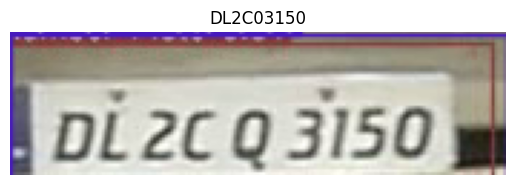

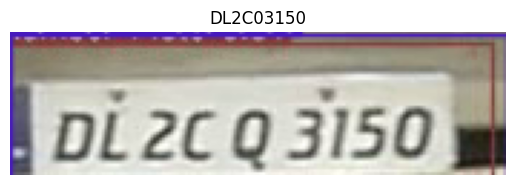

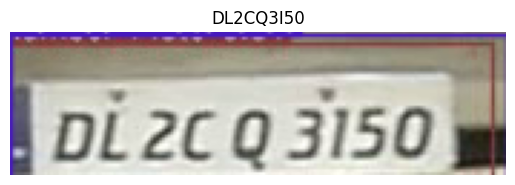

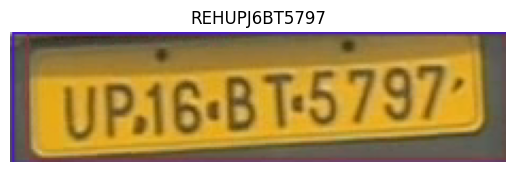

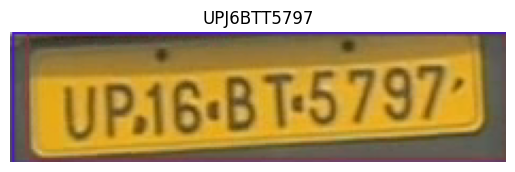

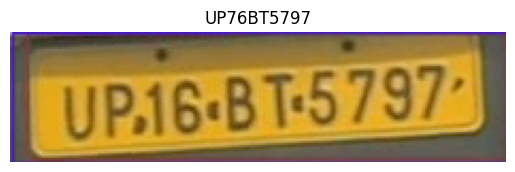

In [25]:

for i in range(len(list)):
    for j in range(len(new_charlist[i])):
        plt.imshow(list[i][0])
        plt.axis('off')
        plt.title(new_charlist[i][j])
        plt.show()